In [ ]:
import k3d
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

import copy
import sys
sys.path.insert(0, "..")

from Geometry.HALL import HALL

In [ ]:
# Create a HALL object with the WCTE located at its origin

hall = HALL('Bldg157')

In [ ]:
# Survey data: dictionary mpmt:c#:[x,y,z] in meters from survey group
# Target data: dictionary target number:[x,y,z] in meters from survey group
# The survey coordinate systems for the supermodules follow the WCTE supermodule conventions (apart from the origin)

#bottom survey missing 11c2, 13c1
bottom_survey_data = {
    0:{1:[0.19633,0.19907,-0.00531],2:[0.19840,-0.19610,-0.00628],3:[-0.19668,0.19684,-0.00574],4:[-0.19504,-0.19801,-0.00708]},
    1:{1:[0.77643,0.19933,-0.00081],2:[0.77862,-0.19605,-0.00190],3:[0.38301,0.19676,-0.00425],4:[0.38497,-0.19822,-0.00513]},
    2:{1:[0.77884,0.77646,-0.00041],2:[0.77656,0.38046,-0.00056],3:[0.38401,0.77724,-0.00355],4:[0.38286,0.38257,-0.00400]},
    3:{1:[-0.19700,0.38157,-0.00545],2:[-0.19668,0.77662,-0.00490],3:[0.19609,0.38030,-0.00537],4:[0.19741,0.77603,-0.00482]},
    4:{1:[-0.77435,0.38145,-0.00242],2:[-0.77509,0.77477,-0.00112],3:[-0.38215,0.38064,-0.00480],4:[-0.38176,0.77404,-0.00430]},
    5:{1:[-0.77469,-0.19898,-0.00479],2:[-0.77702,0.19498,-0.00317],3:[-0.38164,-0.19834,-0.00650],4:[-0.38331,0.19599,-0.00527]},
    6:{1:[-0.77548,-0.77778,-0.00302],2:[-0.77685,-0.38311,-0.00485],3:[-0.38130,-0.77552,-0.00474],4:[-0.38341,-0.38115,-0.00651]},
    7:{1:[-0.19509,-0.77918,-0.00456],2:[-0.19710,-0.38458,-0.00649],3:[0.19764,-0.77715,-0.00350],4:[0.19555,-0.38298,-0.00568]},
    8:{1:[0.77654,-0.38117,-0.00151],2:[0.77660,-0.77629,0.00077],3:[0.38381,-0.38151,-0.00470],4:[0.38396,-0.77581,-0.00262]},
    9:{1:[1.35823,0.19742,0.00895],2:[1.35660,-0.19742,0.00730],3:[0.96578,0.19843,0.00231],4:[0.96284,-0.19458,0.00100]},
    10:{1:[1.35919,0.77375,0.00809],2:[1.35931,0.37968,0.00900],3:[0.96478,0.77511,0.00329],4:[0.96561,0.38061,0.00306]},
    11:{1:[0.77821,1.35644,-0.00217],3:[0.38438,1.35576,-0.00557],4:[0.38424,0.96165,-0.00405]},
    12:{1:[0.19983,1.35732,0.00340],2:[0.19990,0.96099,0.00498],3:[-0.19587,1.35669,0.00340],4:[-0.19587,0.96052,0.00488]},
    13:{2:[-0.77507,1.35396,-0.00223],3:[-0.38110,0.96038,-0.00482],4:[-0.38151,1.35484,-0.00561],},
    14:{1:[-1.35725,0.37871,0.01455],2:[-1.35729,0.77506,0.01443],3:[-0.96183,0.37892,0.00949],4:[-0.96161,0.77469,0.00948]},
    15:{1:[-1.35806,-0.19744,0.00151],2:[-1.35677,0.19744,0.00419],3:[-0.96365,-0.19959,-0.00324],4:[-0.96250,0.19446,-0.00136]},
    16:{1:[-1.35490,-0.78169,0.01301],2:[-1.35710,-0.38533,0.01122],3:[-0.95925,-0.77965,0.00845],4:[-0.96145,-0.38384,0.00658]},
    17:{1:[-0.77479,-1.35591,-0.00469],2:[-0.77378,-0.96141,-0.00259],3:[-0.38126,-1.35588,-0.00638],4:[-0.38043,-0.96203,-0.00434]},
    18:{1:[-0.19623,-1.35452,0.00359],2:[-0.19656,-0.95862,0.00576],3:[0.20011,-1.35454,0.00482],4:[0.19921,-0.95843,0.00671]},
    19:{1:[0.77628,-0.96041,0.00244],2:[0.77744,-1.35405,0.00057],3:[0.38426,-0.96204,-0.00209],4:[0.38507,-1.35475,-0.00388]},
    20:{1:[1.35738,-0.38175,0.00734],2:[1.35694,-0.77567,0.00970],3:[0.96625,-0.38191,0.00124],4:[0.96426,-0.77492,0.00359]}
}

bottom_target_data = {
    0:[1.82988,0.28814,0.12511],
    1:[1.55929,0.86539,0.11548],
    2:[1.00788,1.44522,0.10484],
    3:[0.29197,1.82740,0.09563],
    4:[-0.28672,1.82773,0.09746],
    5:[-1.00336,1.44752,0.10369],
    6:[-1.55940,0.86829,0.11176],
    7:[-1.82931,0.28965,0.11971],
    8:[-1.82974,-0.29018,0.11410],
    9:[-1.55903,-0.87019,0.11054],
    10:[-1.00184,-1.44825,0.10082],
    11:[-0.28810,-1.82469,0.09877],
    12:[0.29052,-1.82763,0.09949],
    13:[1.00802,-1.44850,0.10753],
    14:[1.56003,-0.86907,0.11803],
    15:[1.82903,-0.29063,0.12202]
}

top_survey_data = {
    86:{1:[0.77278,-0.19588,-0.00395],2:[0.77300,0.19690,-0.00413],3:[0.38059,-0.19460,-0.00700],4:[0.38072,0.19785,-0.00723]},
    87:{1:[0.77284,0.38029,-0.00355],2:[0.77194,0.77314,-0.00082],3:[0.38049,0.38228,-0.00657],4:[0.38178,0.77491,-0.00330]},
    88:{1:[-0.19668,0.77315,-0.00351],2:[-0.19600,0.38044,-0.00657],3:[0.19433,0.77344,-0.00411],4:[0.19654,0.38157,-0.00741]},
    89:{1:[-0.77328,0.77397,0.00084],2:[-0.77368,0.38184,-0.00208],3:[-0.38256,0.77431,-0.00281],4:[-0.38181,0.38064,-0.00551]},
    90:{1:[-0.77359,0.19665,-0.00279],2:[-0.77403,-0.19556,-0.00406],3:[-0.38305,0.19622,-0.00631],4:[-0.38334,-0.19474,-0.00695]},
    92:{1:[-0.19779,-0.37885,-0.00687],2:[-0.19699,-0.77165,-0.00398],3:[0.19429,-0.37853,-0.00681],4:[0.19526,-0.77188,-0.00388]},
    93:{1:[0.77058,-0.77189,-0.00004],2:[0.77237,-0.37862,-0.00346],3:[0.37953,-0.77052,-0.00348],4:[0.37962,-0.37798,-0.00642]},
    94:{1:[1.34929,-0.19660,0.00430],2:[1.35046,0.19660,0.00404],3:[0.95708,-0.19484,-0.00183],4:[0.95796,0.19765,-0.00195]},
    95:{1:[1.35146,0.38186,0.00414],2:[1.34976,0.77492,0.00582],3:[0.95934,0.38063,-0.00152],4:[0.95904,0.77279,0.00111]},
    96:{1:[0.77053,0.95847,0.00115],2:[0.77292,1.35110,0.00654],3:[0.38131,0.95792,-0.00112],4:[0.37947,1.35029,0.00581]},
    97:{1:[-0.19666,1.34966,0.00680],2:[-0.19650,0.95746,-0.00132],3:[0.19508,1.35024,0.00582],4:[0.19503,0.95796,-0.00141]},
    98:{1:[-0.77394,1.35104,0.01057],2:[-0.77434,0.96136,0.00321],3:[-0.38216,1.34978,0.00774],4:[-0.38246,0.95836,-0.00075]},
    100:{1:[-1.34972,0.19618,0.00604],2:[-1.35004,-0.19618,0.00436],3:[-0.95954,0.19539,-0.00043],4:[-0.95953,-0.19610,-0.00194]},
    101:{1:[-1.35234,-0.37987,0.00453],2:[-1.35199,-0.77395,0.00691],3:[-0.96021,-0.38057,-0.00159],4:[-0.96096,-0.77342,0.00162]},
    102:{1:[-0.77303,-0.95934,0.00154],2:[-0.77378,-1.35271,0.00572],3:[-0.38239,-0.95773,-0.00161],4:[-0.37993,-1.35003,0.00447]},
    103:{1:[-0.19819,-0.95817,-0.00195],2:[-0.19556,-1.35045,0.00445],3:[0.19362,-0.95622,-0.00191],4:[0.19632,-1.34792,0.00488]},
    104:{1:[0.77352,-1.34842,0.00806],2:[0.77129,-0.95523,0.00211],3:[0.38093,-1.34816,0.00568],4:[0.38023,-0.95594,-0.00119]},
    105:{1:[1.35231,-0.77031,0.00857],2:[1.35102,-0.37755,0.00485],3:[0.96006,-0.76920,0.00349],4:[0.95755,-0.37818,-0.00115]}
}

top_target_data = {
    16:[1.82672,0.29176,-0.23040],
    17:[1.55810,0.86971,-0.23251],
    18:[1.00428,1.44820,-0.23397],
    19:[0.28827,1.82832,-0.22725],
    20:[-0.28995,1.82863,-0.22377],
    21:[-1.00481,1.44893,-0.22733],
    22:[-1.56129,0.87001,-0.22925],
    23:[-1.83038,0.29087,-0.22696],
    24:[-1.83200,-0.28812,-0.22942],
    25:[-1.56405,-0.86968,-0.23151],
    26:[-1.00494,-1.44584,-0.23505],
    27:[-0.29034,-1.82452,-0.22787],
    28:[0.28928,-1.82471,-0.22820],
    29:[1.00625,-1.44578,-0.23203],
    30:[1.55643,-0.86808,-0.22849],
    31:[1.82573,-0.28667,-0.23040]
}

barrel_survey_data = {
    21:{1:[1.73806,0.19795,-0.39215],2:[1.74044,-0.19520,-0.39132],3:[1.73750,0.19712,-0.78489],4:[1.73983,-0.19543,-0.78446]},
    22:{1:[1.53284,0.85615,-0.39135],2:[1.68431,0.49355,-0.39080],3:[1.52987,0.85420,-0.78439],4:[1.68140,0.49188,-0.78373]},
    23:{1:[1.08563,1.38018,-0.38714],2:[1.36409,1.10270,-0.39019],3:[1.08202,1.38084,-0.78043],4:[1.36105,1.10370,-0.78310]},
    24:{1:[0.47213,1.69532,-0.38223],2:[0.83565,1.54566,-0.38444],3:[0.47048,1.69587,-0.77507],4:[0.83366,1.54631,-0.77742]},
    25:{1:[-0.21242,1.75539,-0.37538],2:[0.18051,1.75473,-0.37902],3:[-0.21586,1.75517,-0.76834],4:[0.17688,1.75420,-0.77197]},
    26:{1:[-0.86703,1.54419,-0.37326],2:[-0.50471,1.69690,-0.37616],3:[-0.87017,1.54461,-0.76669],4:[-0.50796,1.69707,-0.76941]},
    28:{1:[-1.70506,0.48362,-0.37167],2:[-1.55783,0.84809,-0.37025],3:[-1.70874,0.48701,-0.76461],4:[-1.56222,0.85122,-0.76309]},
    29:{1:[-1.76137,-0.19840,-0.37294],2:[-1.76447,0.19500,-0.37315],3:[-1.76635,-0.19821,-0.76569],4:[-1.76913,0.19459,-0.76627]},
    30:{1:[-1.55547,-0.85172,-0.37248],2:[-1.70256,-0.48691,-0.37353],3:[-1.56061,-0.85482,-0.76554],4:[-1.70805,-0.49060,-0.76643]},
    31:{1:[-1.11062,-1.37900,-0.37971],2:[-1.38952,-1.10201,-0.37635],3:[-1.11599,-1.38010,-0.77224],4:[-1.39527,-1.10370,-0.76926]},
    33:{1:[0.18685,-1.75249,-0.38537],2:[-0.20586,-1.75151,-0.38107],3:[0.18296,-1.75342,-0.77816],4:[-0.20967,-1.75190,-0.77394]},
    34:{1:[0.84296,-1.54405,-0.38933],2:[0.47904,-1.69336,-0.38779],3:[0.84129,-1.54394,-0.78234],4:[0.47792,-1.69327,-0.78086]},
    35:{1:[1.36929,-1.10150,-0.39320],2:[1.09169,-1.37985,-0.39034],3:[1.36565,-1.10192,-0.78678],4:[1.08809,-1.37959,-0.78393]},
    36:{1:[1.68198,-0.48845,-0.39350],2:[1.53093,-0.85171,-0.39160],3:[1.68022,-0.49012,-0.78651],4:[1.52953,-0.85264,-0.78460]},
    37:{1:[1.74188,0.19657,0.18703],2:[1.74310,-0.19676,0.18556],3:[1.73935,0.19785,-0.20596],4:[1.74033,-0.19504,-0.20756]},
    38:{1:[1.53776,0.85384,0.18927],2:[1.68833,0.49069,0.18779],3:[1.53460,0.85465,-0.20373],4:[1.68569,0.49164,-0.20557]},
    39:{1:[1.08923,1.37947,0.19065],2:[1.36773,1.10199,0.19097],3:[1.08829,1.37847,-0.20262],4:[1.36692,1.10095,-0.20237]},
    40:{1:[0.47736,1.69505,0.19638],2:[0.84086,1.54475,0.19234],3:[0.47343,1.69557,-0.19649],4:[0.83635,1.54527,-0.20077]},
    41:{1:[-0.20738,1.75634,0.20195],2:[0.18577,1.75613,0.19776],3:[-0.21152,1.75544,-0.19091],4:[0.18122,1.75515,-0.19508]},
    42:{1:[-0.86280,1.54364,0.20544],2:[-0.50007,1.69618,0.20343],3:[-0.86497,1.54372,-0.18757],4:[-0.50255,1.69666,-0.18973]},
    43:{1:[-1.38677,1.09849,0.20749],2:[-1.10921,1.37704,0.20587],3:[-1.38903,1.09862,-0.18534],4:[-1.11144,1.37682,-0.18707]},
    44:{1:[-1.70041,0.48617,0.20854],2:[-1.55208,0.85005,0.20593],3:[-1.70313,0.48429,-0.18426],4:[-1.55570,0.84846,-0.18703]},
    46:{1:[-1.55252,-0.84766,0.20623],2:[-1.69899,-0.48300,0.20519],3:[-1.55395,-0.84962,-0.18665],4:[-1.70070,-0.48487,-0.18757]},
    47:{1:[-1.10781,-1.37998,0.19965],2:[-1.38496,-1.10123,0.20419],3:[-1.11189,-1.37757,-0.19352],4:[-1.38944,-1.09952,-0.18917]},
    48:{1:[-0.49908,-1.69576,0.19834],2:[-0.86284,-1.54614,0.20000],3:[-0.50126,-1.69666,-0.19472],4:[-0.86494,-1.54698,-0.19291]},
    49:{1:[0.18708,-1.75354,0.19355],2:[-0.20590,-1.75230,0.19581],3:[0.18473,-1.75278,-0.19972],4:[-0.20841,-1.75125,-0.19731]},
    50:{1:[0.84522,-1.54702,0.19138],2:[0.48174,-1.69632,0.19135],3:[0.84399,-1.54417,-0.20168],4:[0.48108,-1.69361,-0.20185]},
    51:{1:[1.37083,-1.10302,0.18565],2:[1.09309,-1.38174,0.18760],3:[1.36837,-1.10346,-0.20723],4:[1.09105,-1.38164,-0.20545]},
    52:{1:[1.68484,-0.49053,0.18501],2:[1.53429,-0.85375,0.18703],3:[1.68155,-0.49143,-0.20807],4:[1.53101,-0.85446,-0.20634]},
    53:{1:[1.74624,0.19619,0.76683],2:[1.74696,-0.19700,0.76562],3:[1.74333,0.19713,0.37375],4:[1.74405,-0.19571,0.37229]},
    54:{1:[1.54100,0.85344,0.76735],2:[1.69044,0.48966,0.76627],3:[1.53835,0.85347,0.37427],4:[1.68807,0.48991,0.37317]},
    55:{1:[1.09602,1.37821,0.77000],2:[1.37320,1.09958,0.76796],3:[1.09194,1.37792,0.37720],4:[1.37005,1.10018,0.37473]},
    56:{1:[0.48467,1.69676,0.77716],2:[0.84742,1.54533,0.77295],3:[0.47982,1.69564,0.38403],4:[0.84259,1.54427,0.37975]},
    57:{1:[-0.20109,1.75670,0.78193],2:[0.19205,1.75712,0.77806],3:[-0.20487,1.75591,0.38885],4:[0.18827,1.75622,0.38502]},
    58:{1:[-0.85691,1.54586,0.78558],2:[-0.49467,1.69821,0.78353],3:[-0.85868,1.54466,0.39280],4:[-0.49659,1.69744,0.39049]},
    59:{1:[-1.38296,1.10031,0.78668],2:[-1.10525,1.37886,0.78540],3:[-1.38462,1.09979,0.39347],4:[-1.10684,1.37807,0.39223]},
    60:{1:[-1.69823,0.48775,0.78733],2:[-1.54809,0.85083,0.78542],3:[-1.70025,0.48660,0.39445],4:[-1.55047,0.84970,0.39244]},
    61:{1:[-1.76356,-0.19836,0.78587],2:[-1.76538,0.19502,0.78558],3:[-1.75456,-0.19846,0.39272],4:[-1.75643,0.19477,0.39264]},
    62:{1:[-1.55000,-0.84916,0.78531],2:[-1.69642,-0.48467,0.78422],3:[-1.54971,-0.85049,0.39257],4:[-1.69645,-0.48561,0.39118]},
    63:{1:[-1.10640,-1.37990,0.77940],2:[-1.38319,-1.10096,0.78147],3:[-1.10852,-1.37909,0.38625],4:[-1.38497,-1.09990,0.38836]},
    64:{1:[-0.49556,-1.69736,0.77673],2:[-0.85877,-1.54680,0.77917],3:[-0.49831,-1.69639,0.38363],4:[-0.86118,-1.54594,0.38593]},
    65:{1:[0.19000,-1.75327,0.77347],2:[-0.20320,-1.75000,0.77656],3:[0.18642,-1.75367,0.38038],4:[-0.20623,-1.75078,0.38386]},
    66:{1:[0.84885,-1.54774,0.76833],2:[0.48488,-1.69703,0.77162],3:[0.84532,-1.54783,0.37526],4:[0.48169,-1.69723,0.37857]},
    67:{1:[1.37534,-1.10319,0.76519],2:[1.09735,-1.38113,0.76936],3:[1.37127,-1.10428,0.37215],4:[1.09320,-1.38235,0.37610]},
    68:{1:[1.68776,-0.49262,0.76755],2:[1.53596,-0.85520,0.76598],3:[1.68640,-0.49043,0.37421],4:[1.53472,-0.85299,0.37300]},
    69:{1:[1.74986,0.19486,1.34663],2:[1.75079,-0.19835,1.34685],4:[1.74857,-0.19828,0.95368],3:[1.74749,0.19462,0.95340]},
    70:{1:[1.54373,0.85089,1.34647],2:[1.69475,0.48838,1.34525],3:[1.54231,0.85134,0.95356],4:[1.69228,0.48852,0.95210]},
    71:{1:[1.10424,1.38337,1.34933],2:[1.38037,1.10331,1.34883],3:[1.09881,1.37886,0.95647],4:[1.37514,1.09942,0.95579]},
    72:{1:[0.48869,1.69729,1.35491],2:[0.85155,1.54618,1.35271],3:[0.48610,1.69667,0.96199],4:[0.84908,1.54569,0.95952]},
    73:{1:[-0.19755,1.75559,1.36078],2:[0.19562,1.75720,1.35667],3:[-0.20136,1.75628,0.96787],4:[0.19188,1.75769,0.96332]},
    75:{1:[-1.37847,1.10371,1.36550],2:[-1.10048,1.38234,1.36396],3:[-1.37950,1.10312,0.97260],4:[-1.10179,1.38123,0.97106]},
    76:{1:[-1.69452,0.49167,1.36706],2:[-1.54238,0.85390,1.36455],3:[-1.69724,0.48974,0.97401],4:[-1.54569,0.85237,0.97151]},
    78:{1:[-1.54719,-0.85119,1.36312],2:[-1.69383,-0.48643,1.36304],3:[-1.54855,-0.85136,0.96996],4:[-1.69424,-0.48650,0.97016]},
    80:{1:[-0.49440,-1.69857,1.35824],2:[-0.85713,-1.54775,1.36033],3:[-0.49591,-1.69707,0.96517],4:[-0.85893,-1.54624,0.96714]},
    81:{1:[0.19251,-1.75550,1.35376],2:[-0.20076,-1.75209,1.35673],3:[0.18914,-1.75360,0.96046],4:[-0.20365,-1.75037,0.96376]},
    82:{1:[0.84969,-1.54983,1.35062],2:[0.48551,-1.69756,1.35048],3:[0.84935,-1.54844,0.95730],4:[0.48489,-1.69603,0.95732]},
    83:{1:[1.37884,-1.10573,1.34579],2:[1.10032,-1.38336,1.34791],3:[1.37519,-1.10559,0.95296],4:[1.09684,-1.38267,0.95523]},
    84:{1:[1.69249,-0.49342,1.34517],2:[1.53998,-0.85588,1.34465],3:[1.68966,-0.49148,0.95205],4:[1.53766,-0.85395,0.95165]} 
}

barrel_target_data = {
    0:[1.81224,0.29274,-1.18624],
    1:[1.53970,0.86957,-1.18686],
    2:[0.98642,1.44822,-1.18058],
    3:[0.26917,1.82790,-1.17376],
    4:[-0.30927,1.82611,-1.16986],
    5:[-1.02385,1.44372,-1.16815],
    6:[-1.57917,0.86246,-1.16805],
    7:[-1.84650,0.28213,-1.16452],
    8:[-1.84575,-0.29724,-1.16755],
    9:[-1.57330,-0.87647,-1.16968],
    10:[-1.01416,-1.45313,-1.17390],
    11:[-0.29934,-1.82719,-1.17538],
    12:[0.28014,-1.82901,-1.17814],
    13:[0.99572,-1.44703,-1.18555],
    14:[1.54600,-0.86518,-1.18870],
    15:[1.81304,-0.28600,-1.18729],
    16:[1.82960,0.28292,1.88068],
    17:[1.56237,0.86176,1.88260],
    18:[1.01035,1.44183,1.88657],
    19:[0.29484,1.82346,1.89382],
    20:[-0.28351,1.82509,1.89843],
    21:[-0.99919,1.44708,1.90061],
    22:[-1.55710,0.86956,1.90141],
    23:[-1.82781,0.29099,1.90253],
    24:[-1.83082,-0.28874,1.89907],
    25:[-1.56215,-0.86946,1.89967],
    26:[-1.00603,-1.44775,1.89296],
    27:[-0.29253,-1.82824,1.89274],
    28:[0.28670,-1.82977,1.88871],
    29:[1.00458,-1.45246,1.88273],
    30:[1.55643,-0.87625,1.88279],
    31:[1.82711,-0.29556,1.88007]    
}

In [ ]:
fit_mpmt = 1
sm = None
serial_offset = 0
survey_data = None
device_for_coordinate_system = None
z_offset = 0

# Calculate sum of squares of residuals for all fiducials in sm 

def calc_dev2_all():
    sum2 = 0.
    n = 0
    for j_mpmt, mpmt in enumerate(sm.mpmts):
        i_mpmt = j_mpmt + serial_offset
        fiducials_est = mpmt.get_fiducials('est',device_for_coordinate_system=device_for_coordinate_system, z_offset=z_offset)
        for i in range(4):
            survey_xyz = survey_data.get(i_mpmt,{}).get(i+1,None)
            if survey_xyz is not None:
                survey_location = np.array(survey_xyz)*1000.
                diff = np.subtract(fiducials_est[i],survey_location)
                sum2 += np.dot(diff,diff)
                n += 1
    return n, sum2

# Calculate sum of squares of residuals for the fiducials in the fit mpmt

def calc_dev2_one():
    sum2 = 0.
    n = 0
    fiducials_est = sm.mpmts[fit_mpmt].get_fiducials('est',device_for_coordinate_system=device_for_coordinate_system, z_offset=z_offset)
    for i in range(4):
        survey_xyz = survey_data.get(fit_mpmt+serial_offset,{}).get(i+1,None)
        if survey_xyz is not None:
            survey_location = np.array(survey_xyz)*1000.
            diff = np.subtract(fiducials_est[i],survey_location)
            sum2 += np.dot(diff,diff)
            n += 1
    return n, sum2

# parameters specify the sm placement
def calc_dev2_sm(params):
    loc = [params[i] for i in range(3)]
    rot_angles = [params[i] for i in range(3,6)]
    sm.place_est['loc'] = loc
    sm.place_est['rot_angles'] = rot_angles
    
    n, sum2 = calc_dev2_all()
    return sum2

# parameters specify the fit_mpmt placement
def calc_dev2_mpmt(params):
    loc = [params[i] for i in range(3)]
    rot_angles = [params[i] for i in range(3,6)]
    sm.mpmts[fit_mpmt].place_est['loc'] = loc
    sm.mpmts[fit_mpmt].place_est['rot_angles'] = rot_angles
    
    n, sum2 = calc_dev2_one()
    return sum2

# targets:

def calc_dev2_all_targets(verbose=False):
    sum2 = 0.
    n = 0
    for j_target, target in enumerate(sm.targets):
        i_target = j_target + serial_offset
        target_est = target.get_placement('est',device_for_coordinate_system=device_for_coordinate_system)['location']
        survey_xyz = survey_data.get(i_target,None)
        if survey_xyz is not None:
            survey_location = np.array(survey_xyz)
            diff = np.subtract(target_est,survey_location)
            sum2 += np.dot(diff,diff)
            n += 1
            if verbose:
                print('target',i_target,'diff:',diff,'diff2:',np.dot(diff,diff))
    return n, sum2

# parameters specify the sm placement
def calc_dev2_sm_targets(params):
    loc = [params[i] for i in range(3)]
    rot_angles = [params[i] for i in range(3,6)]
    sm.place_est['loc'] = loc
    sm.place_est['rot_angles'] = rot_angles
    
    n, sum2 = calc_dev2_all_targets()
    return sum2

In [ ]:
# To reduce the number of transformations we use the survey coordinate system to define the endcap coordinate systems. Note that the survey coordinate system origin is
# quite far from the design origin. This does not introduce any overall error.
# While the nominal WCTE convention has the endcap z=0 at the top surfaces of the mPMT baseplates, the survey sets the z=0 at the mean z of the mPMTs fiducials. 
#
# The separation between the fiducials and the mPMT x-y plane is 178.08 mm: 9.53 mm from the thickness of the baseplate, 148.55 from the length of the target 
# extendsion, and 20 mm for the survey target z offset.
# 

# Start with the bottom and top endcaps: find the placements of the mPMTs in the bottom/top encap coordinate systems by minimizing the square deviations

wcte = hall.wcds[0]
bottom = wcte.sms[0]
top = wcte.sms[2]

# initialize the placements to be at the design locations (execute this to start over), but offset them in z to be close to the survey (helps optimization)
for mpmt in bottom.mpmts:
    mpmt.place_est = copy.deepcopy(mpmt.place_design)
    mpmt.place_est['loc'][2] += 178.08
    
for mpmt in top.mpmts:
    mpmt.place_est = copy.deepcopy(mpmt.place_design)
    mpmt.place_est['loc'][2] -= 178.08

In [ ]:
# find optimal endcap mpmt placement parameters - start from the current values stored in place_est

for sm in [bottom,top]:
    survey_data = {'bottom':bottom_survey_data, 'top':top_survey_data}[sm.name]
    device_for_coordinate_system = sm
    z_offset = -178.08
    serial_offset = {'bottom':0, 'top':85}[sm.name]
    
    for fit_mpmt in range(len(sm.mpmts)):
    
        start = list(sm.mpmts[fit_mpmt].place_est['loc']) + list(sm.mpmts[fit_mpmt].place_est['rot_angles'])
        result = optimize.minimize(calc_dev2_mpmt, start)
        
        n, sum2 = calc_dev2_one()
        if n>1:
            rms = np.sqrt(sum2/n)
            if rms > 1.:
                print('mpmt', fit_mpmt, result.message)
                print('est:', sm.mpmts[fit_mpmt].get_placement('est',device_for_coordinate_system=sm))       
                print('rms of residuals:', rms)
    
    n, sum2 = calc_dev2_all()
    print('rms all:',np.sqrt(sum2/n))

In [ ]:
# Save the locations of the targets in the endcap coordinate systems - as "est"
i_target = 0
for sm,survey_data in zip([bottom,top],[bottom_target_data,top_target_data]):
    for target in sm.targets:
        loc = [survey_data[i_target][i]*1000. for i in range(3)]
        place_design_copy = copy.deepcopy(target.place_design)
        place_design_copy['loc'] = loc
        target.place_est = place_design_copy
        i_target += 1

In [ ]:
# original strategy:

# 1. Move the barrel to minimize the sum of the squares of the residuals of the fiducials
# 2. optimize the barrel mPMT placements
# 3. optimize the endcap placements by minimizing the sum of the squares of the residuals of the targets

# modified:
# eliminate step #1 to simplify (allowing survey data to be used directly)
# at the end, could move the wcte within the room?


In [ ]:
# initialize the placements to be at the design locations (execute this to start over)
barrel = wcte.sms[1]

barrel.place_est = copy.deepcopy(barrel.place_design)
for mpmt in barrel.mpmts:
    mpmt.place_est = copy.deepcopy(mpmt.place_design)

In [ ]:
# find optimal barrel placement parameters within wcte - start from the current values stored in place_est
# The z-offset is 9.35 mm (baseplate thickness) + 19.71 mm (target extension) + 20 mm (survey target z offset) = 49.06 mm

sm = barrel
serial_offset = 21

device_for_coordinate_system = wcte
z_offset = -49.06

# translate survey data z -> y, x -> z, y -> x
survey_data_raw = barrel_survey_data
survey_data = {}
for impmt in survey_data_raw:
    fiducials = {}
    for i in range(1,5):
        fiducials[i] = [survey_data_raw[impmt][i][1],survey_data_raw[impmt][i][2],survey_data_raw[impmt][i][0]]
    survey_data[impmt] = fiducials


start = sm.place_est['loc'] + sm.place_est['rot_angles']

# *** This step is disabled so that survey data does not need to be transformed
#result = optimize.minimize(calc_dev2_sm, start)
#print(result.message)
    
print('est:', sm.get_placement('est'))

n, sum2 = calc_dev2_all()
print('rms of residuals:', np.sqrt(sum2/n))

In [ ]:
# optimize the barrel mPMT placements (with the smaller survey extensions the RMS is much better)

for fit_mpmt in range(len(sm.mpmts)):

    start = list(sm.mpmts[fit_mpmt].place_est['loc']) + list(sm.mpmts[fit_mpmt].place_est['rot_angles'])
    result = optimize.minimize(calc_dev2_mpmt, start)
    
    n, sum2 = calc_dev2_one()
    if n>1:
        rms = np.sqrt(sum2/n)
        if rms > 1.:
            print('mpmt', fit_mpmt, result.message)
            print('est:', sm.mpmts[fit_mpmt].get_placement('est'))       
            print('rms of residuals:', rms)

n, sum2 = calc_dev2_all()
print('rms all:',np.sqrt(sum2/n))

In [ ]:
# initialize the placements of the endcaps to be at the design locations (execute this to start over)
bottom.place_est = copy.deepcopy(bottom.place_design)
top.place_est = copy.deepcopy(top.place_design)

In [ ]:
# apply change of axis directions from barrel to wcte

survey_points = []
for i in barrel_target_data:
    survey_points.append([barrel_target_data[i][1]*1000.,barrel_target_data[i][2]*1000.,barrel_target_data[i][0]*1000.])
    

survey_data = {}
for i in range(32):
    survey_data[i] = survey_points[i]


In [ ]:
# optimize the endcap placements by minimizing the sum of the squares of the residuals of the targets

for sm in [bottom,top]:
    serial_offset = {'bottom':0, 'top':16}[sm.name]
    device_for_coordinate_system = wcte
    z_offset = 0
    
    # find optimal sm placement parameters - start from the current values stored in place_est
    start = sm.place_est['loc'] + sm.place_est['rot_angles']
    result = optimize.minimize(calc_dev2_sm_targets, start)
    print(result.message)
        
    print('est:', sm.get_placement('est'))
    
    n, sum2 = calc_dev2_all_targets(verbose=True)
    print('rms of residuals:', np.sqrt(sum2/n))


In [ ]:
# Make 3D plot showing results of combined survey... show displacements of mPMTs from design locations

plot = k3d.plot()

# mpmt coordinates
color_z = 0x0000ff
color_x = 0xff0000
color_y = 0x00ff00
origins = []
z_vecs = []
x_vecs = []
y_vecs = []
vec_length = 100. # length of x,z vectors to show for each pmt
deviation_scale = 10. # scale factor for showing deviations
color_deviation = 0xff0000
deviation_vecs = []

color_mpmt = 0xabb2b9
color_mpmt_c = 0xabb2b9
color_missing_mpmt = 0xe091e6
missing_mpmts = [27, 32, 45, 74, 77, 79, 85, 91, 99]
color_target = 0xad4113

n_point_mpmt = 8
indices_mpmt = []
for i in range(n_point_mpmt):
    indices_mpmt.append([i,(i+1)%n_point_mpmt])

n_fd_point_mpmt = 40
fd_indices_mpmt = []
for i in range(n_fd_point_mpmt):
    fd_indices_mpmt.append([i,(i+1)%n_fd_point_mpmt])
    
n_point_ft = 20
indices_ft = []
for i in range(n_point_ft):
    indices_ft.append([i,(i+1)%n_point_ft])
    
# draw the extent of the mpmt baseplates
for i_mpmt,mpmt in enumerate(wcte.mpmts):
    
    p = mpmt.get_placement('design')
    location, direction_x, direction_z = p['location'], p['direction_x'], p['direction_z']
    direction_y = np.cross(direction_z,direction_x)
    
    baseplate_points = np.array(mpmt.get_xy_points('design'),dtype=np.float32)
    color = color_mpmt
    if i_mpmt in missing_mpmts:
        color = color_missing_mpmt
        
    indices = indices_mpmt
    if mpmt.kind == 'FD':
        indices = fd_indices_mpmt
    plt_baseplate = k3d.lines(baseplate_points, indices, indices_type='segment', color=color)
    plot += plt_baseplate
    
    if i_mpmt not in missing_mpmts:
        if mpmt.kind != 'FD':
            feedthrough_points = np.array(mpmt.get_xy_points('design', feature='feedthrough'),dtype=np.float32)
            plt_feedthrough = k3d.lines(feedthrough_points, indices_ft, indices_type='segment', color=color_mpmt)
            plot += plt_feedthrough
        else:
            feedthrough1_points = np.array(mpmt.get_xy_points('design', feature='fd_feedthrough1'),dtype=np.float32)
            plt_feedthrough1 = k3d.lines(feedthrough1_points, indices_ft, indices_type='segment', color=color_mpmt)
            plot += plt_feedthrough1
            feedthrough2_points = np.array(mpmt.get_xy_points('design', feature='fd_feedthrough2'),dtype=np.float32)
            plt_feedthrough2 = k3d.lines(feedthrough2_points, indices_ft, indices_type='segment', color=color_mpmt)
            plot += plt_feedthrough2
            
        # show a vector from the estimated to the surveyed
        p_est = mpmt.get_placement('est')
        location_est = p_est['location']
        origins.append(location)
        diff = np.subtract(location_est,location)
        scaled_diff = list(diff*deviation_scale)
        deviation_vecs.append(scaled_diff)

        
    # k3d complains about the following not being float32!
    color = color_mpmt_c
    if i_mpmt in missing_mpmts:
        color = color_missing_mpmt
    plt_text = k3d.text(str(i_mpmt), position=location, reference_point='cc', size=1., label_box=False, color=color)
    plot += plt_text

# draw the targets
if 1==2:
    for sm in wcte.sms:
        first_target = {'bottom':0, 'barrel':0, 'top':16}[sm.name]
        target_origins = []
        if 1==1 and sm.targets is not None:
            for i_target, target in enumerate(sm.targets):
                
                p = target.get_placement('design')
                location, direction_x, direction_z = p['location'], p['direction_x'], p['direction_z']
                target_origins.append(location)
                text_location = [location[j] - 10.*direction_z[j] for j in range(3)]
                plt_text = k3d.text(str(i_target+first_target), position=text_location, reference_point='cc', size=1., label_box=False, color=color_target)
                plot += plt_text

plt_deviation_vecs = k3d.vectors(origins=origins, vectors=deviation_vecs, color=color_deviation, head_size=250.)
plot += plt_deviation_vecs

plot.display()

In [ ]:
print(bottom.mpmts[0].get_placement('design'))
print(bottom.mpmts[0].get_placement('est', device_for_coordinate_system=wcte))

In [ ]:
print(bottom.targets[0].get_placement('design'))
print(bottom.targets[0].get_placement('est', device_for_coordinate_system=wcte))

In [ ]:
missing_mpmts = [27, 32, 45, 74, 77, 79, 85, 91, 99]
for sm in [barrel,bottom,top]:
    diff_sum = [0.,0.,0.]
    diff_mag_sum = 0.
    n=0
    for mpmt in sm.mpmts:
        location = mpmt.get_placement('design')['location']
        location_est = mpmt.get_placement('est')['location']
        diff = np.subtract(location_est,location)
        diff_mag = np.sqrt(np.dot(diff,diff))
        if int(mpmt.name) not in missing_mpmts:
            diff_sum = np.add(diff_sum,diff)
            diff_mag_sum += diff_mag
            n += 1
    print(sm.name,len(sm.mpmts),n,[df/n for df in diff_sum],diff_mag_sum/n)
            

In [ ]:
# compare the distance from the mean location of all mPMTs to each mPMT
sum_locations = [0.,0.,0.]
sum_locations_est = [0.,0.,0.]
for mpmt in wcte.mpmts:
    if int(mpmt.name) not in missing_mpmts:
        location = mpmt.get_placement('design')['location']
        sum_locations = np.add(sum_locations,location)
        location = mpmt.get_placement('est')['location']
        sum_locations_est = np.add(sum_locations_est,location)
        n+=1
        
mean_location = np.divide(sum_locations,n)
mean_location_est = np.divide(sum_locations_est,n)
print('mean location:',mean_location)
print('mean location est:',mean_location_est)

for sm in [barrel,bottom,top]:
    delta=[]
    for mpmt in sm.mpmts:
        if int(mpmt.name) not in missing_mpmts:
            location = mpmt.get_placement('design')['location']
            location_est = mpmt.get_placement('est')['location']
            diff = np.subtract(location,mean_location)
            diff_est = np.subtract(location_est,mean_location_est)
            diff_mag = np.sqrt(np.dot(diff,diff))
            diff_mag_est = np.sqrt(np.dot(diff_est,diff_est))
            delta.append(diff_mag_est-diff_mag)
    print(sm.name,len(delta),np.mean(delta),np.std(delta))


In [ ]:
# compare the directions of the mPMTs

for sm in [barrel,bottom,top]:
    dot_xs = []
    dot_zs = []
    rad_xs = []
    rad_zs = []
    for mpmt in sm.mpmts:
        if int(mpmt.name) not in missing_mpmts:
            direction_x = mpmt.get_placement('design')['direction_x']
            direction_z = mpmt.get_placement('design')['direction_z']
            direction_x_est = mpmt.get_placement('est')['direction_x']
            direction_z_est = mpmt.get_placement('est')['direction_z']
            dot_x = np.dot(direction_x,direction_x_est)
            dot_z = np.dot(direction_z,direction_z_est)
            dot_xs.append(dot_x)
            dot_zs.append(dot_z)
            rad_xs.append(np.arccos(dot_x))
            rad_zs.append(np.arccos(dot_z))
    print(sm.name,np.mean(dot_xs),np.std(dot_xs),np.mean(dot_zs),np.std(dot_zs),np.mean(rad_xs),np.std(rad_xs),np.mean(rad_zs),np.std(rad_zs))

[1.16459437e-02 3.53514732e-02 1.78942633e+02 1.08677977e-01]


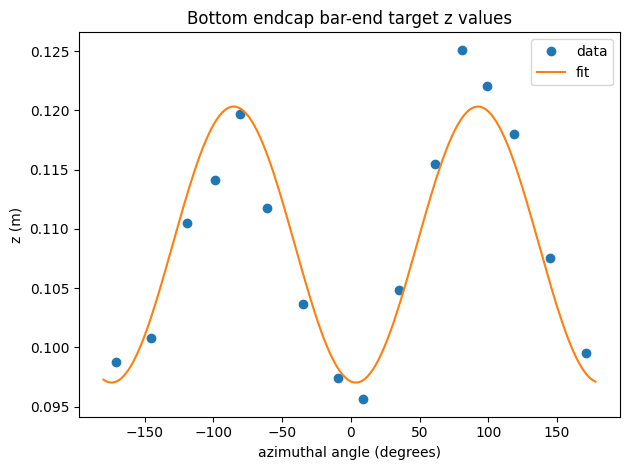

In [55]:
zvals = [bottom_target_data[i][2] for i in range(16)]
azimuths = [np.arctan2(bottom.targets[i].place_design['loc'][0], bottom.targets[i].place_design['loc'][1])*180/np.pi for i in range(16)]

# fit the z values to a cosine curve
def func(x, a, b, c, d):
    return a*np.cos(b*x+c)+d

result = optimize.curve_fit(func, azimuths, zvals, p0=[0.012,0.03,180.,0.11])
print(result[0])

plt.plot(azimuths,zvals,'o',label='data')
plt.plot(np.arange(-180,180,2),[func(x,*result[0]) for x in np.arange(-180,180,2)],label='fit')
#plt.plot(np.arange(-180,180,2),[func(x,*[0.012,0.03,180.,0.11]) for x in np.arange(-180,180,2)],label='fit')
plt.legend()
plt.ylabel('z (m)')
plt.xlabel('azimuthal angle (degrees)')
plt.title('Bottom endcap bar-end target z values')
plt.tight_layout()
plt.savefig('C:/Users/karlen/Downloads/bottom_endcap_z_fit.png')
plt.show()

[-0.01225453  0.83510248  3.29660865  0.10833654]


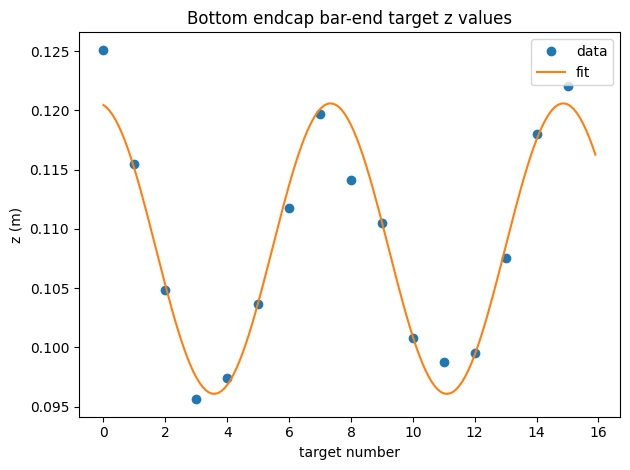

In [56]:
zvals = [bottom_target_data[i][2] for i in range(16)]

# fit the z values to a cosine curve
def func(x, a, b, c, d):
    return a*np.cos(b*x+c)+d

result = optimize.curve_fit(func, range(16), zvals)
print(result[0])

plt.plot(range(16),zvals,'o',label='data')
plt.plot(np.arange(0,16,0.1),[func(x,*result[0]) for x in np.arange(0,16,0.1)],label='fit')
plt.legend()
plt.ylabel('z (m)')
plt.xlabel('target number')
plt.title('Bottom endcap bar-end target z values')
plt.tight_layout()
plt.savefig('C:/Users/karlen/Downloads/bottom_endcap_z_fit_target.png')
plt.show()

In [44]:
azimuth

1.413886300678449